In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Importing all libraries

In [2]:
data=pd.read_csv('drugl.csv')
#reading the data set

In [3]:
data.head(10)
# Displaying the dataset

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,Sides,UsefulCount
0,35-44,Anxiousness associated with Depression,02-06-2020,lexapro,63990,1,1,1,Female,"Nausea , dry mouth , trouble sleeping , con...",0
1,,"""Change of Life"" Signs",1/23/2020,lexapro,63990,3,2,1,Female,"Nausea , dry mouth , trouble sleeping , con...",0
2,55-64,Depression,1/23/2020,lexapro,63990,5,3,3,Male,"Nausea , dry mouth , trouble sleeping , con...",0
3,65-74,Depression,1/21/2020,lexapro,63990,3,1,1,Female,"Nausea , dry mouth , trouble sleeping , con...",0
4,75 or over,Anxiousness associated with Depression,12/27/2019,lexapro,63990,4,2,2,Female,"Nausea , dry mouth , trouble sleeping , con...",0
5,35-44,Depression,12/20/2019,lexapro,63990,5,5,4,Male,"Nausea , dry mouth , trouble sleeping , con...",2
6,45-54,Repeated Episodes of Anxiety,12-09-2019,lexapro,63990,5,5,5,Female,"Nausea , dry mouth , trouble sleeping , con...",0
7,,Other,11/14/2019,lexapro,63990,2,1,4,Male,"Nausea , dry mouth , trouble sleeping , con...",0
8,25-34,Anxiousness associated with Depression,10/15/2019,lexapro,63990,5,5,5,,"Nausea , dry mouth , trouble sleeping , con...",0
9,19-24,Repeated Episodes of Anxiety,10-11-2019,lexapro,63990,5,5,5,,"Nausea , dry mouth , trouble sleeping , con...",1


In [4]:
# Shape(Number of rows and columns)
data.shape

(4134, 11)

In [5]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,4134.0,4134.000000,4134.000000,4134.000000,4134.000000
mean,63990.0,4.356072,3.755201,3.504112,6.052008
std,0.0,1.101861,1.371856,1.498885,8.406929
min,63990.0,1.000000,1.000000,1.000000,0.000000
25%,63990.0,4.000000,3.000000,2.000000,1.000000
50%,63990.0,5.000000,4.000000,4.000000,4.000000
75%,63990.0,5.000000,5.000000,5.000000,8.000000
max,63990.0,5.000000,5.000000,5.000000,154.000000


In [6]:
data.drop(['DrugId','Date'],axis=1,inplace=True)
#removing unnecessary columns from the dataset

In [7]:
data.shape

(4134, 9)

In [8]:
for i in ['Age','Condition', 'Drug', 'EaseofUse', 'Effectiveness','Satisfaction', 'Sex', 'Sides', 'UsefulCount']:
    data[i]=data[i].replace(r'^\s*$',np.NaN, regex=True)
#filling the vacant spaces using NaN

In [9]:
data.dtypes
#finding datatpyes of each column

Age              object
Condition        object
Drug             object
EaseofUse         int64
Effectiveness     int64
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

In [10]:
data['Age'].value_counts()

45-54         871
25-34         846
35-44         809
55-64         602
19-24         393
65-74         215
13-18         155
75 or over     64
07-Dec          3
03-Jun          1
Name: Age, dtype: int64

In [11]:
data['Age']=data['Age'].replace(['75 or over'],'75')
data['Age']=data['Age'].replace(['45-54'],'50')
data['Age']=data['Age'].replace(['55-64'],'60')
data['Age']=data['Age'].replace(['35-44'],'40')
data['Age']=data['Age'].replace(['25-34'],'30')
data['Age']=data['Age'].replace(['65-74'],'70')
data['Age']=data['Age'].replace(['19-24'],'22')
data['Age']=data['Age'].replace(['13-18'],'16')
data['Age']=data['Age'].replace(['07-Dec'],'1')
data['Age']=data['Age'].replace(['03-Jun'],'1')
data['Age']=data['Age'].replace(['0-2'],'1')

In [12]:
data['Age'].value_counts()

50    871
30    846
40    809
60    602
22    393
70    215
16    155
75     64
1       4
Name: Age, dtype: int64

In [13]:
data['Age']=data['Age'].astype(float)
#changing datatype to float

In [14]:
data.dtypes

Age              float64
Condition         object
Drug              object
EaseofUse          int64
Effectiveness      int64
Satisfaction       int64
Sex               object
Sides             object
UsefulCount        int64
dtype: object

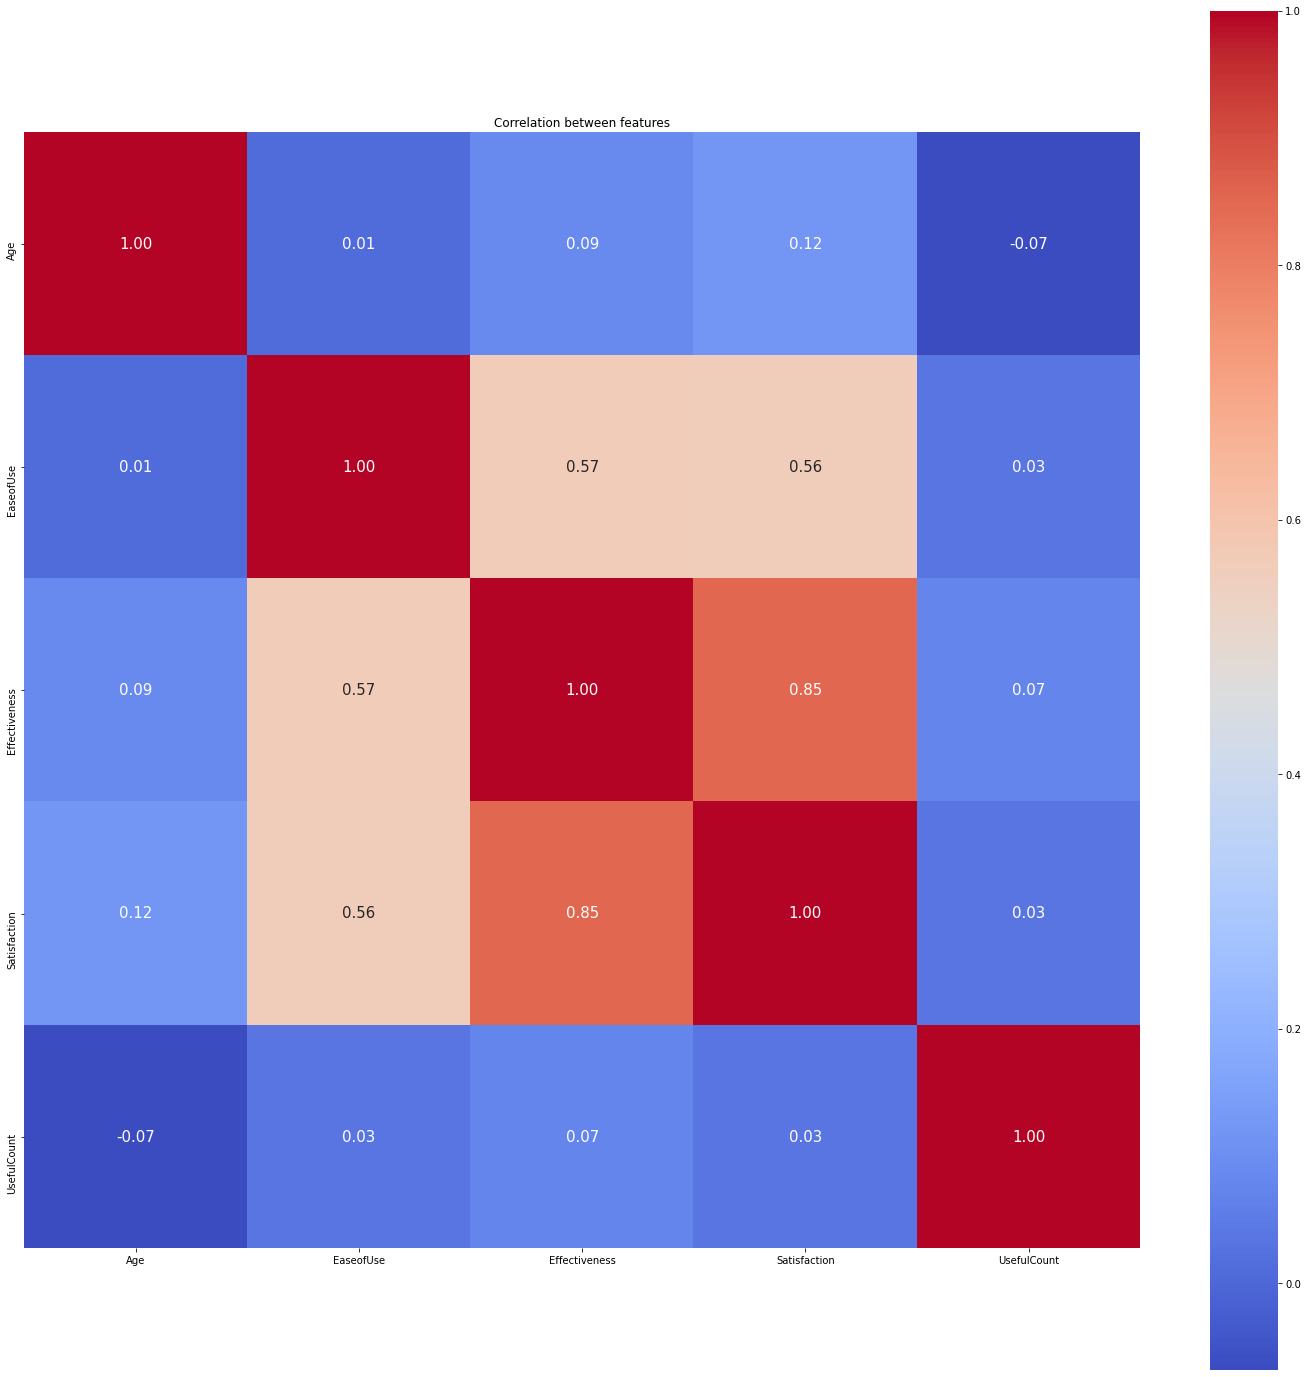

In [15]:
# Correlation
data_corr = data.corr()

plt.figure(figsize=(25, 25))
sns.heatmap(data_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

effectiveness of the drug and satisfaction shows high positive correlation,
ease of use and satisfaction is also showing positive correlation

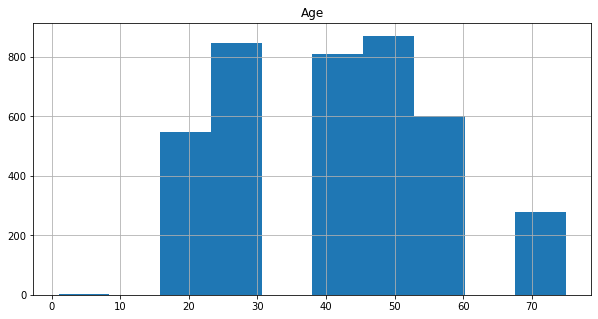

In [16]:
freq_graph=data.select_dtypes(include=['float'])
freq_graph.hist(figsize=(10,5))  
plt.show()

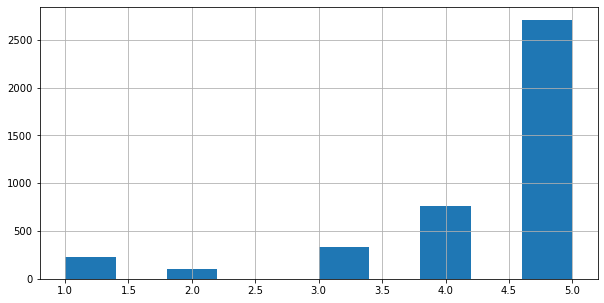

In [17]:
freq_graph=data['EaseofUse']
freq_graph.hist(figsize=(10,5))  
plt.show()

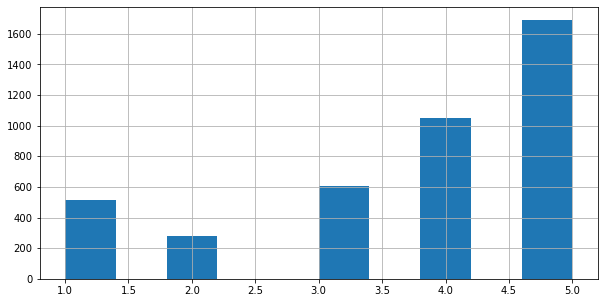

In [18]:
freq_graph=data['Effectiveness']
freq_graph.hist(figsize=(10,5))  
plt.show()

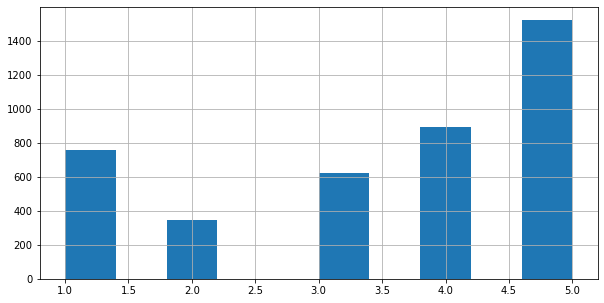

In [19]:
freq_graph=data['Satisfaction']
freq_graph.hist(figsize=(10,5))  
plt.show()

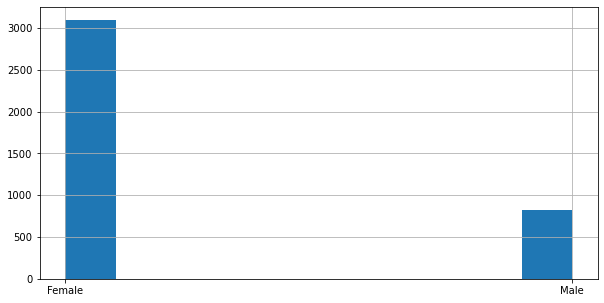

In [20]:
freq_graph=data['Sex']
freq_graph.hist(figsize=(10,5))  
plt.show()

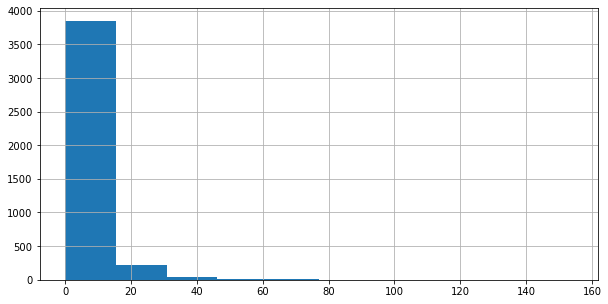

In [21]:
freq_graph=data['UsefulCount']
freq_graph.hist(figsize=(10,5))  
plt.show()

Text(0, 0.5, 'UsefulCount')

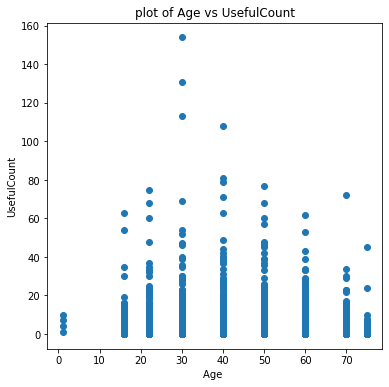

In [22]:
plt.figure(figsize=(6,6))
plt.scatter(data['Age'],data['UsefulCount'])
plt.title('plot of Age vs UsefulCount')
plt.xlabel('Age ')
plt.ylabel('UsefulCount')

Text(0, 0.5, 'Effectiveness')

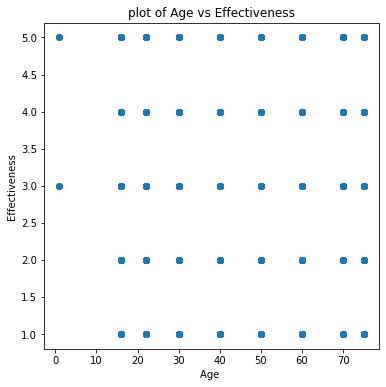

In [23]:
plt.figure(figsize=(6,6))
plt.scatter(data['Age'],data['Effectiveness'])
plt.title('plot of Age vs Effectiveness')
plt.xlabel('Age ')
plt.ylabel('Effectiveness')

Text(0, 0.5, 'Satisfaction')

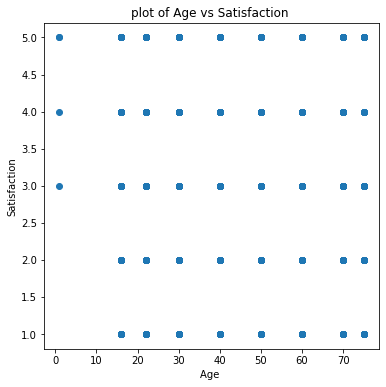

In [24]:
plt.figure(figsize=(6,6))
plt.scatter(data['Age'],data['Satisfaction'])
plt.title('plot of Age vs Satisfaction ')
plt.xlabel('Age ')
plt.ylabel('Satisfaction')

Text(0, 0.5, 'Effectiveness')

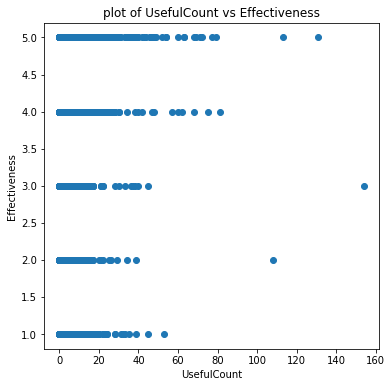

In [25]:
plt.figure(figsize=(6,6))
plt.scatter(data['UsefulCount'],data['Effectiveness'])
plt.title('plot of UsefulCount vs Effectiveness')
plt.xlabel('UsefulCount')
plt.ylabel('Effectiveness')

In [26]:
data.isna().sum()
#checking for null values

Age              175
Condition          1
Drug               0
EaseofUse          0
Effectiveness      0
Satisfaction       0
Sex              222
Sides              0
UsefulCount        0
dtype: int64

In [27]:
data=data.dropna()
#dropping null values

In [28]:
data.shape

(3854, 9)

Text(0.5, 0, 'Satisfaction')

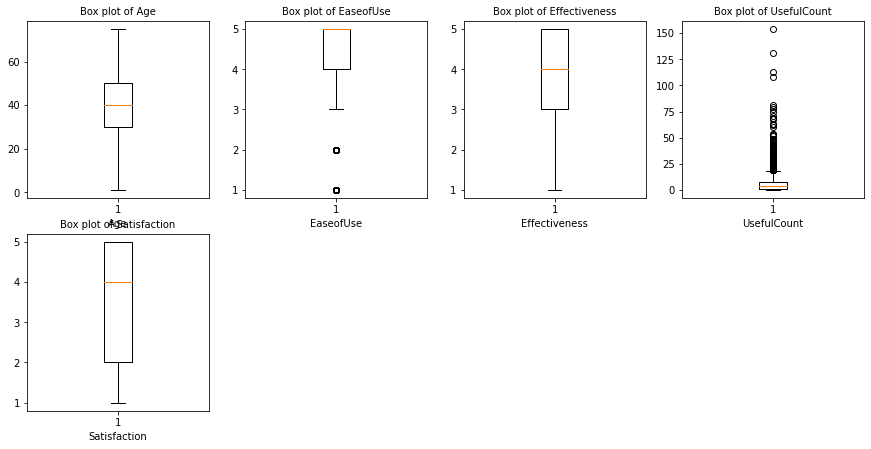

In [29]:
plt.figure(figsize=(15,15))

plt.subplot(4,4,1)
plt.boxplot(data['Age'])
plt.title('Box plot of Age', fontsize=10)
plt.xlabel('Age')

plt.subplot(4,4,2)
plt.boxplot(data['EaseofUse'])
plt.title('Box plot of EaseofUse', fontsize=10)
plt.xlabel('EaseofUse')

plt.subplot(4,4,3)
plt.boxplot(data['Effectiveness'])
plt.title('Box plot of Effectiveness', fontsize=10)
plt.xlabel('Effectiveness')

plt.subplot(4,4,4)
plt.boxplot(data['UsefulCount'])
plt.title('Box plot of UsefulCount', fontsize=10)
plt.xlabel('UsefulCount')

plt.subplot(4,4,5)
plt.boxplot(data['Satisfaction'])
plt.title('Box plot of Satisfaction', fontsize=10)
plt.xlabel('Satisfaction')
#for finding whether outliers are present in the data boxplots are plotted

outliers are present in usefulcount column

In [30]:
Q1=np.percentile(data['UsefulCount'],25,interpolation='midpoint')
Q2=np.percentile(data['UsefulCount'],50,interpolation='midpoint')
Q3=np.percentile(data['UsefulCount'],75,interpolation='midpoint')
IQR = Q3 - Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
print('Lower limit = ', lower_limit)
print('Upper limit = ', upper_limit)
#finding upper limit values and lower limit calues

Lower limit =  -9.5
Upper limit =  18.5


In [31]:
index_1 = data['UsefulCount']>upper_limit 
out_up = data.loc[index_1].index
for x in out_up:
    data = data.drop(x)
#removing outliers

In [32]:
data.shape

(3672, 9)

In [33]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data=data.apply(lb.fit_transform)
#encoding the data

In [34]:
data
#encoded data is displayed

,Age,Condition,Drug,EaseofUse,Effectiveness,Satisfaction,Sex,Sides,UsefulCount
0,4,1,0,0,0,0,0,6,0
2,6,3,0,4,2,2,1,6,0
3,7,3,0,2,0,0,0,6,0
4,8,1,0,3,1,1,0,6,0
5,4,3,0,4,4,3,1,6,2
...,...,...,...,...,...,...,...,...,...
4128,5,3,0,4,3,3,0,6,1
4129,2,9,0,4,4,2,1,6,1
4130,2,2,0,4,0,1,1,6,2
4131,6,6,0,3,2,2,0,6,1


In [35]:
y=data['Sides']
x=data.drop(['Sides'],axis=1)
#splitting the data into input variables and target variable

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
datas=scaler.fit_transform(x)
#scaling the input variables

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.2)
#splitting the dataset into testing set and training set

# Logistic regression model

In [38]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

C:\Users\AHALYA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_test,y_pred)

0.9959183673469387

In [40]:
confusion_matrix(y_test, y_pred)

array([[  0,   1,   0,   0],
       [  0, 732,   0,   0],
       [  0,   1,   0,   0],
       [  0,   1,   0,   0]], dtype=int64)

# KNN Model

In [41]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(2,15)
for k in neighbors:
    model=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

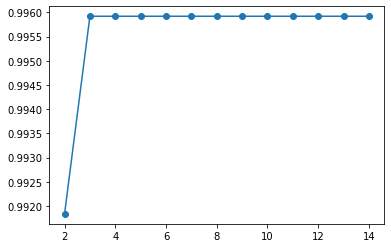

In [42]:
plt.plot(neighbors,acc_values,"o-")

In [43]:
model=KNeighborsClassifier(n_neighbors=14,metric='minkowski')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.9959183673469387

In [44]:
confusion_matrix(y_test, y_pred)

array([[  0,   1,   0,   0],
       [  0, 732,   0,   0],
       [  0,   1,   0,   0],
       [  0,   1,   0,   0]], dtype=int64)

# Decision Tree model

In [45]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.9904761904761905

In [46]:
confusion_matrix(y_test, y_pred)

array([[  0,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   1, 728,   0,   2,   0],
       [  0,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0]], dtype=int64)

# Random Forest Model

In [47]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
accuracy_score(y_test,y_pred)

0.9959183673469387

In [48]:
confusion_matrix(y_test, y_pred)

array([[  0,   1,   0,   0],
       [  0, 732,   0,   0],
       [  0,   1,   0,   0],
       [  0,   1,   0,   0]], dtype=int64)

# Gradient Boosting Model

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
accuracy_score(y_test,y_pred)

0.9836734693877551

In [50]:
confusion_matrix(y_test, y_pred)

array([[  0,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   2, 723,   0,   6,   0],
       [  0,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0]], dtype=int64)

# SVM Model

In [51]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [52]:
accuracy_score(y_test,y_pred)

0.9959183673469387

In [53]:
confusion_matrix(y_test, y_pred)

array([[  0,   1,   0,   0],
       [  0, 732,   0,   0],
       [  0,   1,   0,   0],
       [  0,   1,   0,   0]], dtype=int64)

In [54]:
from sklearn.svm import SVC
model=SVC(kernel='rbf',degree=3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.9959183673469387

In [55]:
confusion_matrix(y_test, y_pred)

array([[  0,   1,   0,   0],
       [  0, 732,   0,   0],
       [  0,   1,   0,   0],
       [  0,   1,   0,   0]], dtype=int64)

In [56]:
svm_poly=SVC(kernel='poly',degree=4)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)
accuracy_score(y_test,y_pred)

0.9959183673469387

In [57]:
confusion_matrix(y_test, y_pred)

array([[  0,   1,   0,   0],
       [  0, 732,   0,   0],
       [  0,   1,   0,   0],
       [  0,   1,   0,   0]], dtype=int64)

In [58]:
pd.Series(model1.feature_importances_, index=x.columns).sort_values(ascending=False)*100
#Feature importance

UsefulCount      34.799270
Condition        18.000974
Age              16.462525
Satisfaction     14.147444
Effectiveness     7.889337
EaseofUse         4.931310
Sex               3.769139
Drug              0.000000
dtype: float64